In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np

from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('temp.csv', names=['movieName', 'director', 'company', 'distributor', 'openDt',
                                'type1', 'type2', 'genre', 'grade', 'num_actors', 'num_staffs', 'running_time', 
                                'top3_actors', 'num_screen', 'num_seats', 'seoul_seats', 'num_sales', 'seoul_sales'])

,movieName,director,company,distributor,openDt,type1,type2,genre,grade,num_actors,num_staff,running_time,num_seats,seoul_seats,actor1,actor2,actor3,openMonth
137,광복절 특사,143,39,146,2002-11-20,1,1,6,2,18,157,120.0,3101900,1097363,990,589,607,11
94,색즉시공,641,997,123,2002-12-11,1,1,18,3,31,116,96.0,4082797,1313067,833,1228,1301,12
998,H(에이치),777,643,180,2002-12-19,1,1,13,2,24,140,123.0,90000,30041,978,682,1212,12
289,품행제로,956,871,207,2002-12-26,1,1,18,2,30,194,99.0,1694637,569421,338,67,1057,12
723,마들렌,351,977,146,2003-01-10,1,1,6,2,17,145,118.0,365656,146482,954,610,504,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,소설가 구보의 하루,859,587,291,2021-12-09,1,0,6,1,25,37,72.0,3145,2033,413,163,99,12
1693,나는 조선사람입니다,254,564,234,2021-12-09,1,0,5,1,6,48,93.0,3461,1737,27,295,451,12
2301,갱경떡삥이,1005,44,17,2021-12-27,1,0,6,3,23,33,106.0,565,565,1044,1044,581,12
952,해피 뉴 이어,41,1010,161,2021-12-29,1,1,7,1,95,298,137.0,114046,32328,1078,792,38,12


In [15]:
df = df.sort_values(by=['openDt'])
df.head(3)

,movieName,director,company,distributor,openDt,type1,type2,genre,grade,num_actors,num_staff,running_time,top3_actor,num_screen,num_seats,seoul_seats,num_sales,seoul_sales
137,광복절 특사,김상진,㈜감독의집,(주)시네마서비스,2002-11-20,장편,일반영화,드라마,15세관람가,18,157,120.0,"차승원,송윤아,설경구",0,3101900,1097363,0.0,0.0
1052,죽어도 좋아,박진표,메이필름(주),영화사청어람(주),2002-12-05,장편,독립/예술영화,드라마,18세관람가,2,54,67.0,"박치규,이순예",0,60666,30187,0.0,0.0
94,색즉시공,윤제균,㈜필름지,(주)쇼박스,2002-12-11,장편,일반영화,코미디,18세관람가,31,116,96.0,"임창정,하지원,최성국",0,4082797,1313067,0.0,0.0


In [16]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

def preprocess_company(company):
    replace_dict = {'㈜':'', '(주)':'', '주식회사': '', '(유)': ''}
    com_list = company.split(',')
    com_list = [replace_all(com,replace_dict).strip() for com in com_list]
    return com_list[0]

def preprocess_grade(grade):
    grade = grade.strip()
    grade_dict = {'전체관람가':0, 
                  '12세관람가': 1, 
                  '12세이상관람가':1, 
                  '15세관람가':2, 
                  '15세이상관람가':2, 
                  '18세관람가':3, 
                  '청소년관람불가':3, 
                  '제한상영가' : 3}
    
    return grade_dict[grade]

def split_actors(x, idx):
    result = x.split(',')
    if len(result) > idx:
        return result[idx]
    else:
        return None
    
def split_date(x):
    result = x.split('-')
    return int(result[1])

director_le = LabelEncoder()
type1_le = LabelEncoder()
type2_le = LabelEncoder()
genre_le = LabelEncoder()
company_le = LabelEncoder()
distributor_le = LabelEncoder()
actor1_le = LabelEncoder()
actor2_le = LabelEncoder()
actor3_le = LabelEncoder()


df['actor1']= df['top3_actor'].apply(split_actors, idx=0)
df['actor2']= df['top3_actor'].apply(split_actors, idx=1)
df['actor3']= df['top3_actor'].apply(split_actors, idx=2)

df['company'] = df['company'].apply(lambda x : preprocess_company(x))
df['distributor'] = df['distributor'].apply(lambda x : preprocess_company(x))
df['grade'] = df['grade'].apply(lambda x : preprocess_grade(x))
df['openMonth'] = df['openDt'].apply(split_date)

df.dropna(axis=0, inplace=True)
df.drop(['top3_actor'], axis=1, inplace=True)

# 임시!
df.drop(['num_screen', 'num_sales', 'seoul_sales'], axis=1, inplace=True)

df['director'] = director_le.fit_transform(df['director'])
df['type1'] = type1_le.fit_transform(df['type1'])
df['type2'] = type2_le.fit_transform(df['type2'])
df['genre'] = genre_le.fit_transform(df['genre'])
df['company'] = company_le.fit_transform(df['company'])
df['distributor'] = distributor_le.fit_transform(df['distributor'])
df['actor1'] = actor1_le.fit_transform(df['actor1'])
df['actor2'] = actor2_le.fit_transform(df['actor2'])
df['actor3'] = actor3_le.fit_transform(df['actor3'])


df.head(3)

,movieName,director,company,distributor,openDt,type1,type2,genre,grade,num_actors,num_staff,running_time,num_seats,seoul_seats,actor1,actor2,actor3,openMonth
137,광복절 특사,143,39,146,2002-11-20,1,1,6,2,18,157,120.0,3101900,1097363,990,589,607,11
94,색즉시공,641,997,123,2002-12-11,1,1,18,3,31,116,96.0,4082797,1313067,833,1228,1301,12
998,H(에이치),777,643,180,2002-12-19,1,1,13,2,24,140,123.0,90000,30041,978,682,1212,12


In [17]:
X = df[['director', 'company', 'distributor', 'type1', 'type2', 'genre', 'grade', 'num_actors', 'num_staff', 'running_time', 'actor1', 'actor2', 'actor3', 'openMonth']]
y = df[['num_seats']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 42)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

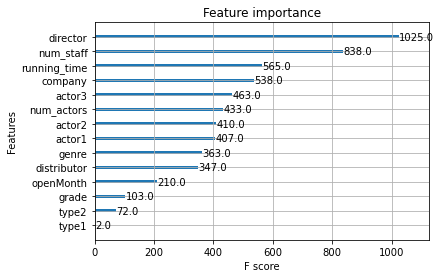

In [18]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_model.fit(x_train, y_train)
xgb.plot_importance(xgb_model)

In [19]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAE: %.2f" % mae)

MSE: 1540780213480.76
RMSE: 1241281.68
MAE: 578775.64


In [20]:
y_test

,num_seats
1513,6580
1363,12311
1539,5732
956,109195
1142,36986
...,...
703,404456
213,2199048
2456,370
1238,21599


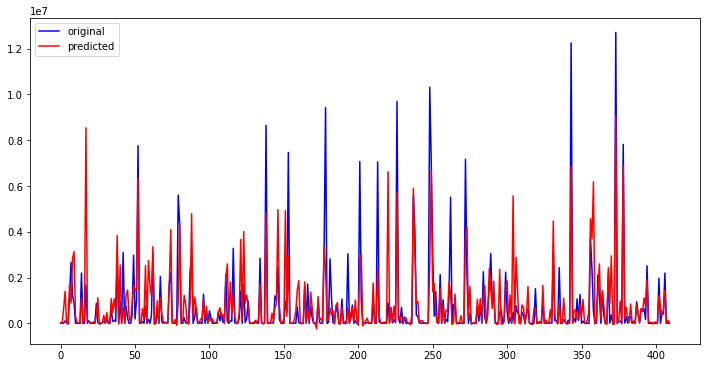

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot([i for i in range(len(y_test))], y_test.values, color="blue", label="original")
plt.plot([i for i in range(len(y_test))], predictions, color="red", label="predicted")
plt.legend()
plt.show()
